In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('abalone.csv') 

In [142]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


__Описание данных:__

Sex - nominal - M, F, and I (infant)                                      
(Пол - номинальный - М, Ж и Я (детеныш))

Length - continuous - mm - Longest shell measurement                      
(Длина - непрерывная - мм - самое длинное измерение раковины)

Diameter - continuous - mm - perpendicular to length                      
(Диаметр - непрерывный - мм - перпендикулярно длине)

Height - continuous - mm - with meat in shell                             
(Высота - непрерывная - мм - с мясом в раковине)

Whole weight - continuous - grams - whole abalone                         
(Весь вес - непрерывный - граммы - целое морское ушко)

Shucked weight - continuous - grams - weight of meat                      
(Вес очищенного от раковины - непрерывный - граммы - вес мяса)

Viscera weight - continuous - grams - gut weight (after bleeding)         
(Вес внутренностей - непрерывный - граммы - вес кишечника (после обескровливания))

Shell weight - continuous - grams - after being dried                     
(Вес раковины - непрерывный - граммы - после сушки)

Rings - integer - +1.5 gives the age in years (target)                    
(Колечки - целое - +1,5 дает возраст в годах (целевой))

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [147]:
df.shape

(4177, 9)

In [149]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [151]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [153]:
df.describe(include=object)

,Sex
count,4177
unique,4
top,M
freq,1447


In [155]:
df.Sex.unique()

array(['M', 'F', 'I', 'f'], dtype=object)

В описании данных указано три возможных значения для столбца "Sex", значит, произошла ошибка при внесении данных. Некоторые строки значения "F" занесены с нижним регистром. Сразу исправим это: 

In [158]:
df['Sex'].replace('f', 'F', inplace=True)

C:\Users\Алена\AppData\Local\Temp\ipykernel_1452\4180780923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace('f', 'F', inplace=True)


In [160]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [162]:
df.duplicated().sum()

0

Дублирующихся строк нет, посмотрим на пропущенные значения:

In [165]:
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

Пропущенных значений не так много, поэтому мы можем заменить их медианой.

In [168]:
Diameter_median = df['Diameter'].median()
df['Diameter'].fillna(Diameter_median, inplace=True)

C:\Users\Алена\AppData\Local\Temp\ipykernel_1452\1091871868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diameter'].fillna(Diameter_median, inplace=True)


In [170]:
Whole_weight_median = df['Whole weight'].median()
df['Whole weight'].fillna(Whole_weight_median, inplace=True)

C:\Users\Алена\AppData\Local\Temp\ipykernel_1452\3245758924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Whole weight'].fillna(Whole_weight_median, inplace=True)


In [172]:
Shell_weight_median = df['Shell weight'].median()
df['Shell weight'].fillna(Shell_weight_median, inplace=True)

C:\Users\Алена\AppData\Local\Temp\ipykernel_1452\508235628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shell weight'].fillna(Shell_weight_median, inplace=True)


In [174]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Мы провели некоторое исследование данных и обработали пропущенные значение, теперь приступим к __однофакторному анализу__: 

Взглянем на распределения каждого из параметров:

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

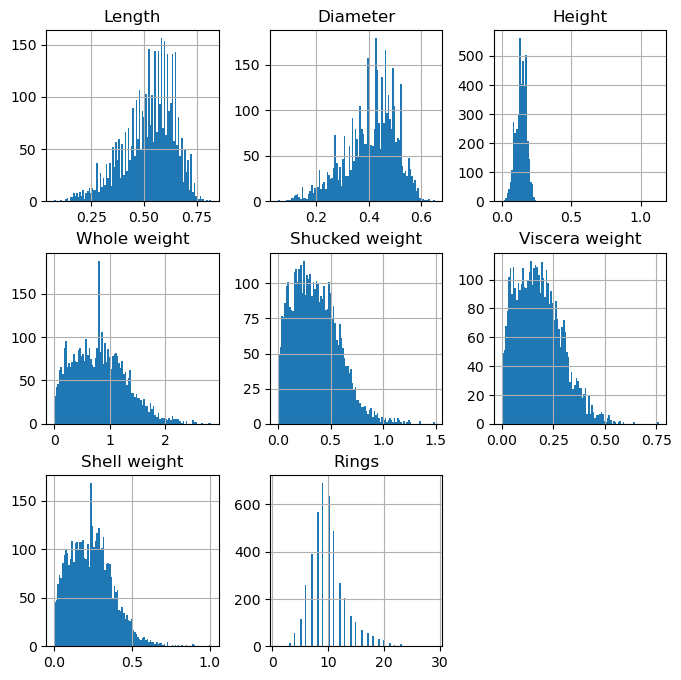

In [178]:
df.hist(bins=100, figsize=(8,8))

Посмотрим на самое легкое, самое тяжелое ушко в нашем датасете:

In [180]:
df['Whole weight'].min(), df['Whole weight'].max()

(0.002, 2.8255)

In [181]:
df['Whole weight'].min(), df['Whole weight'].max()

(0.002, 2.8255)

Посмотрим на некоторые параметры в зависимости от пола: 

In [183]:
# Средние значения

df.groupby('Sex').agg({'Length':'mean',
                     'Diameter':'mean',
                     'Height':'mean',
                     'Whole weight':'mean'})

,Length,Diameter,Height,Whole weight
Sex,,,,
F,0.572978,0.448652,0.155959,1.017649
I,0.427273,0.328382,0.107931,0.438131
M,0.560059,0.438072,0.150847,0.977255


In [184]:
# Медианные значения

df.groupby('Sex').agg({'Length':'median',
                     'Diameter':'median',
                     'Height':'median',
                     'Whole weight':'median'})

,Length,Diameter,Height,Whole weight
Sex,,,,
F,0.585,0.455,0.155,0.99475
I,0.435,0.335,0.110,0.39100
M,0.580,0.455,0.150,0.95500


Как мы видим, у взрослых особей (F и M) общий вес имеет сильное отличие от детенышей, хотя такие параметры как длина и диаметр в среднем схожи.

In [191]:
df.groupby('Sex').agg(MaxRings=('Rings','max'),
                     MinRings=('Rings', 'min'),
                     MeanRing=('Rings', 'mean'))

,MaxRings,MinRings,MeanRing
Sex,,,
F,29,3,11.001376
I,21,1,7.872257
M,27,3,10.678645


Построим матрицу корреляций, чтобы посмотреть какие параметры влияют больше всего на возраст:

<Axes: >

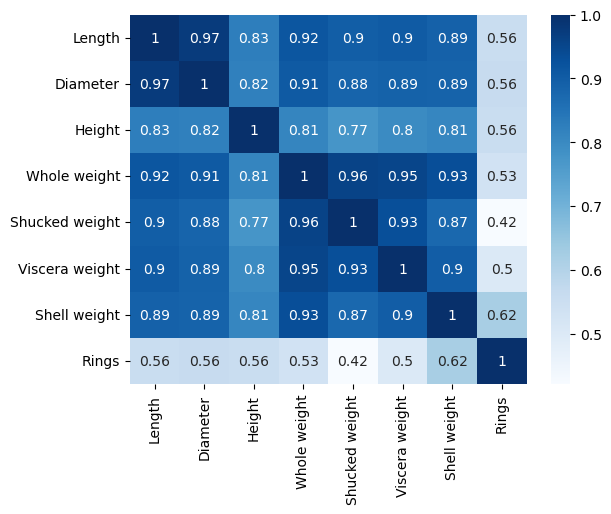

In [194]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True)

Наиболее сильная корелляция по отношению к возрасту у нас с параметром Shell weight (Вес раковины), построим для этого параметра scatter-plot:

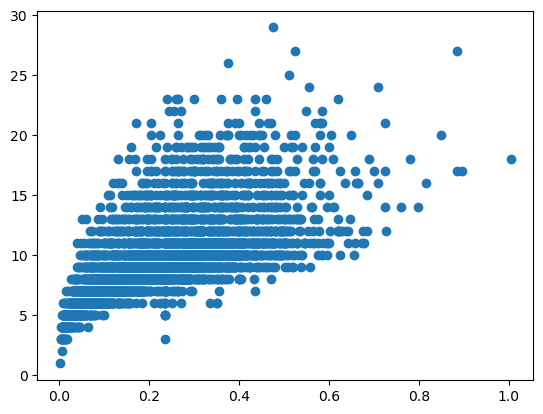

In [197]:
plt.scatter(df['Shell weight'], df.Rings)

Взглянем на другие параметры - такие как длина, диаметр, высота:

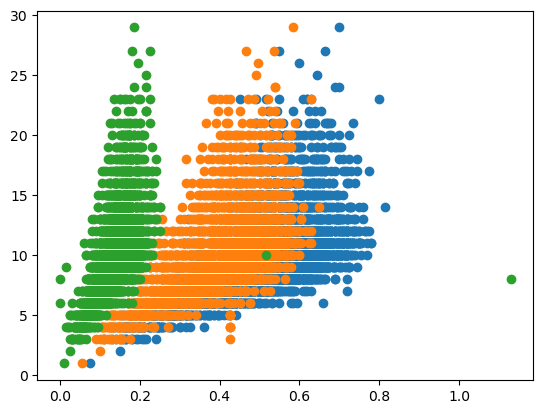

In [200]:
plt.scatter(df['Length'], df.Rings);
plt.scatter(df['Diameter'], df.Rings);
plt.scatter(df['Height'], df.Rings);

Построим корреляцию Спирмена:

<Axes: >

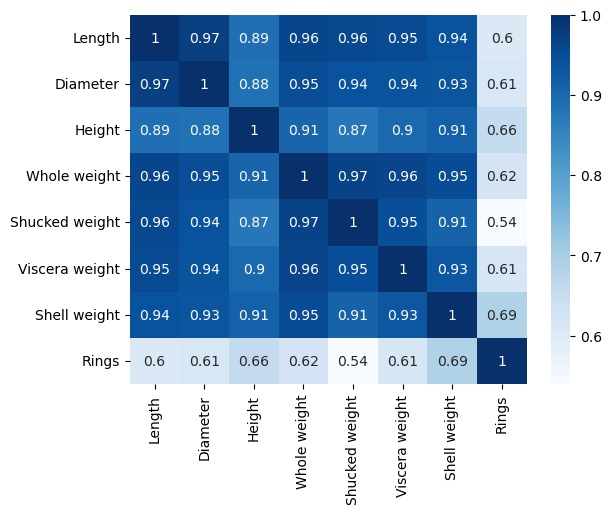

In [203]:
corr = df.corr(method='spearman', numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True)

У нас есть всего один категориальный параметр, поэтому мы не можем оценить v-меру Крамера. Проведем метод ANOVA:

In [206]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


Как мы видим, наша категориальный признак имеет значимую взаимосвязь с каждым другим признаком.

Изучим целевую переменную:

In [210]:
df.Rings.min(), df.Rings.max(), df.Rings.mean(), df.Rings.median()

(1, 29, 9.933684462532918, 9.0)

In [212]:
len(df[df.Rings>= 15]) # количество ушок возрастом выше 15

364

In [214]:
100 * len(df[df.Rings>= 15]) / len(df) # процентов ушок, возрастом выше 15

8.714388316973904

Посмотрим на распределение целевой переменной:

<Axes: xlabel='Rings', ylabel='Count'>

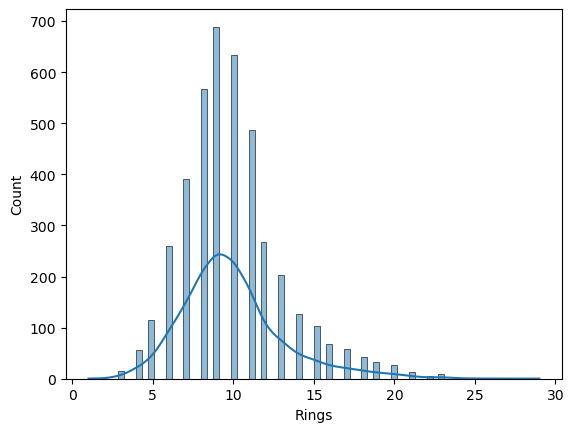

In [217]:
sns.histplot(data = df['Rings'], kde=True)

Распределение похоже на логнормальное. Большая часть значений сосредоточена в малом диапозоне, но при этом есть редкие и сильные выбросы, модель может быть плохо обучена для предсказывания последних.  

In [220]:
# Проведем сравнение скорости работы библиотек Pandas и Polars на увеличенном датасете: 

df_big = df.copy()
for i in range(250):
    df_big = pd.concat([df_big, df])

df_big.to_csv('abalone_big.csv', index=False)

In [221]:
df_big.shape, df.shape # Теперь в большом датасете у нас есть чуть более миллиона строк

((1048427, 9), (4177, 9))

In [222]:
!pip install polars

import polars as pl

print(pl.__version__)

Defaulting to user installation because normal site-packages is not writeable
1.23.0


In [223]:
%%time
#Pandas: загрузка данных
df_big = pd.read_csv('abalone_big.csv')

CPU times: total: 469 ms
Wall time: 458 ms


In [224]:
%%time
#Polars: загрузка данных
df_pl = pl.read_csv('abalone_big.csv')

CPU times: total: 359 ms
Wall time: 49.6 ms


In [225]:
%%time
#Pandas: фильтрация

df_big.query('Rings >= 15')

CPU times: total: 15.6 ms
Wall time: 18 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
28,M,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.295,15
...,...,...,...,...,...,...,...,...,...
1048180,F,0.670,0.535,0.185,1.5970,0.6275,0.3500,0.470,21
1048181,I,0.550,0.440,0.165,0.8605,0.3120,0.1690,0.300,17
1048191,F,0.540,0.440,0.160,1.0905,0.3910,0.2295,0.355,15
1048194,M,0.550,0.440,0.160,0.9910,0.3480,0.1680,0.375,20


In [226]:
%%time
#Polars: фильтрация

df_pl.filter(pl.col('Rings')>15)

CPU times: total: 15.6 ms
Wall time: 5.5 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""F""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""F""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""F""",0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19
"""F""",0.665,0.525,0.165,1.338,0.5515,0.3575,0.35,18
"""F""",0.68,0.55,0.175,1.798,0.815,0.3925,0.455,19
…,…,…,…,…,…,…,…,…
"""F""",0.65,0.515,0.215,1.498,0.564,0.323,0.425,16
"""F""",0.67,0.535,0.185,1.597,0.6275,0.35,0.47,21
"""I""",0.55,0.44,0.165,0.8605,0.312,0.169,0.3,17


In [227]:
%%time
#Pandas: агрегация

df_big.groupby('Sex').agg({'Rings':'mean'})

CPU times: total: 46.9 ms
Wall time: 45.6 ms


,Rings
Sex,
F,11.001376
I,7.872257
M,10.678645


In [228]:
%%time
#Polars: агрегация

df_pl.group_by('Sex').agg([pl.mean('Rings')])

CPU times: total: 93.8 ms
Wall time: 20.9 ms


Sex,Rings
str,f64
"""M""",10.678645
"""I""",7.872257
"""F""",11.001376


Как мы видим, Polars имеет преимущества перед Pandas.